# **Project Goal**

## **Objective**
The primary goal of this project is to use **supervised learning techniques** to predict **customer spending behavior**. By analyzing relevant features such as:

- **Age**
- **Annual Income**
- **Gender**
- **Purchase Frequency**
- Other behavioral metrics,

we aim to build a model that can accurately predict **Spending Score** by customers.

---

## **Summary**
1. **Problem Statement**:
   Understanding customer spending behavior is critical for optimizing marketing strategies, enhancing customer retention, and improving overall business decision-making.

2. **Approach**:
   - Use a **linear regression model** as the baseline supervised learning method.
   - Analyze and preprocess features such as **Age**, **Annual Income**, **Gender**, and others.
   - Evaluate the model's performance using metrics like **Mean Squared Error (MSE)** and **R-squared**.

3. **Outcome**:
   - A predictive model capable of estimating customer spending scores.
   - Insights into the relationships between customer attributes and spending behavior.

---

## **Significance**
This project serves as a foundation for data-driven decision-making in customer behavior analysis, enabling businesses to:
- Target specific customer segments with personalized marketing strategies.
- Identify high-value customers based on predicted spending patterns.
- Optimize resource allocation and improve ROI on marketing campaigns.



In [115]:
## IMPORTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Load the dataset

file_path = "Mall_Customers.csv"
data = pd.read_csv(file_path)
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [119]:
# Structure of that Data Set;

print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [121]:
# Data Cleaning

# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [123]:
data.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

In [125]:
# Convert specific rows in numerical columns to float and update the column type
rows_to_convert = [0, 2, 3, 4]
columns_to_convert = ['Age', 'Annual Income', 'Spending Score']  # Replace with your column names

# Convert specific rows and ensure the entire column is of type float
for col in columns_to_convert:
    data.loc[rows_to_convert, col] = data.loc[rows_to_convert, col].astype(float)
    data[col] = data[col].astype(float)  # Ensure the entire column is float

# Convert the 'Gender' column from object to string
data['Gender'] = data['Gender'].astype('string')

# Check the updated DataFrame
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    string 
 2   Age             200 non-null    float64
 3   Annual Income   200 non-null    float64
 4   Spending Score  200 non-null    float64
dtypes: float64(3), int64(1), string(1)
memory usage: 7.9 KB
None
   CustomerID  Gender   Age  Annual Income  Spending Score
0           1    Male  19.0           15.0            39.0
1           2    Male  21.0           15.0            81.0
2           3  Female  20.0           16.0             6.0
3           4  Female  23.0           16.0            77.0
4           5  Female  31.0           17.0            40.0


In [135]:
# Map Gender values to numerical values: Male -> 1, Female -> 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Verify the change
print(data.head())  # Display the first few rows to confirm
print(data.dtypes)  # Confirm the data type


   CustomerID  Gender   Age  Annual Income  Spending Score
0           1       1  19.0           15.0            39.0
1           2       1  21.0           15.0            81.0
2           3       0  20.0           16.0             6.0
3           4       0  23.0           16.0            77.0
4           5       0  31.0           17.0            40.0
CustomerID          int64
Gender              int64
Age               float64
Annual Income     float64
Spending Score    float64
dtype: object


In [137]:
# Summary statistics for numerical columns
print(data.describe())

       CustomerID      Gender         Age  Annual Income  Spending Score
count  200.000000  200.000000  200.000000     200.000000      200.000000
mean   100.500000    0.440000   38.850000      60.560000       50.200000
std     57.879185    0.497633   13.969007      26.264721       25.823522
min      1.000000    0.000000   18.000000      15.000000        1.000000
25%     50.750000    0.000000   28.750000      41.500000       34.750000
50%    100.500000    0.000000   36.000000      61.500000       50.000000
75%    150.250000    1.000000   49.000000      78.000000       73.000000
max    200.000000    1.000000   70.000000     137.000000       99.000000


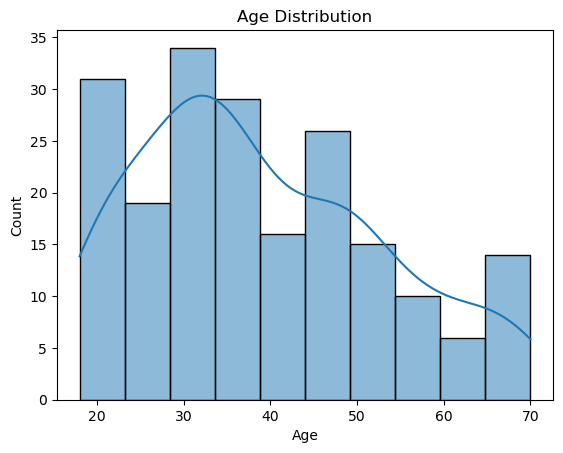

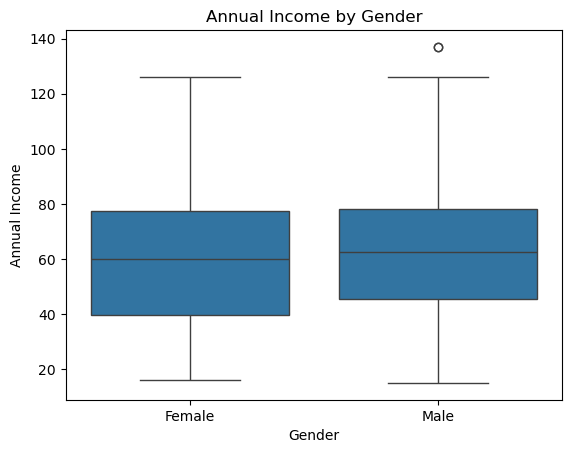

In [139]:
# Histogram for Age distribution
sns.histplot(data['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()

# Draw the boxplot with custom labels
sns.boxplot(x='Gender', y='Annual Income', data=data)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Replace 0 and 1 with custom labels
plt.title('Annual Income by Gender')
plt.show()




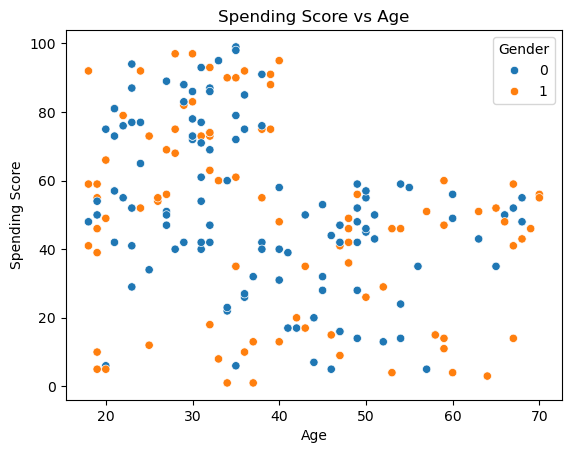

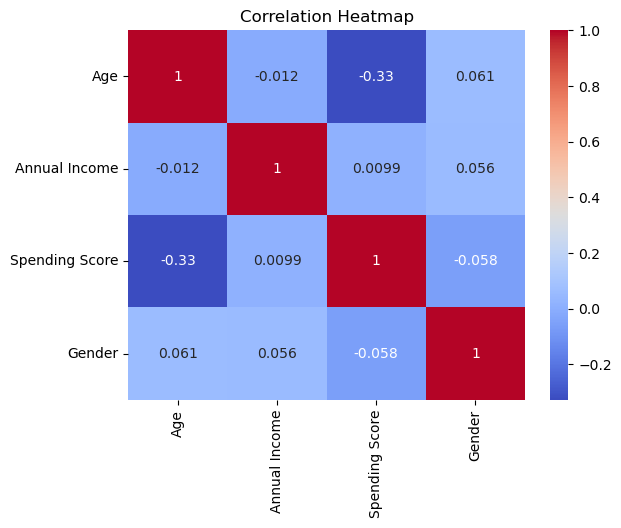

In [141]:
# Scatterplot for Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score', hue='Gender', data=data)
plt.title('Spending Score vs Age')
plt.show()

# Correlation Heatmap
correlation = data[['Age', 'Annual Income', 'Spending Score', 'Gender']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [225]:
#Building the Linear Regression Model
#Load data
X = data[['Age','Annual Income','Gender']].values
y =data['Spending Score'].values
#The 1 in the column of ones added to the feature matrix X serves as the constant multiplier for β0, the intercept term.
X = np.c_[np.ones(X.shape[0]), X]  # Augment X with a column of ones

#β=(X^T X)^−1 X^T y
X_t = X.T #X
X_tX = np.dot(X_t,X) #(X^T X)
X_tX_inv = np.linalg.inv(X_tX)
X_t_y = np.dot(X_t,y) #X^T y
beta = np.dot(X_tX_inv,X_t_y) # β

print(beta)


[ 7.39300336e+01 -6.00371040e-01  7.92939510e-03 -2.01323375e+00]


In [227]:
# Calculate variance of the target variable
variance = np.var(y)
print("Variance of Spending Score:", variance)

# Calculate baseline MSE (predicting the mean for all observations)
baseline_mse = np.mean((y - np.mean(y)) ** 2)
print("Baseline MSE:", baseline_mse)

# Compare model MSE to variance and baseline MSE
print("Model MSE:", mse)



Variance of Spending Score: 663.52
Baseline MSE: 663.52
Model MSE: 480.673141707248


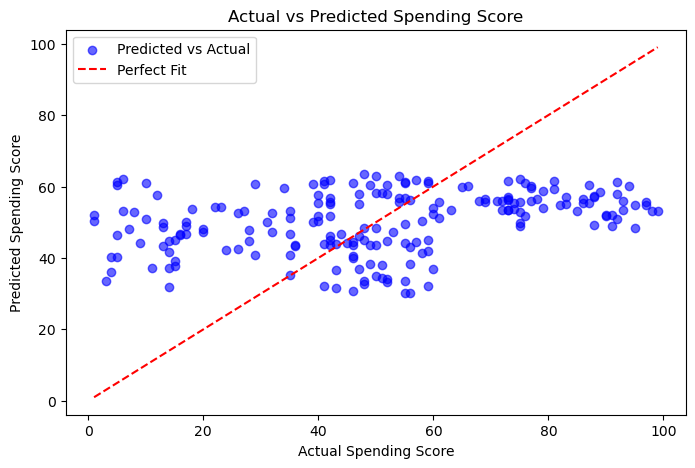

In [229]:
# Make predictions
y_pred = np.dot(X, beta)

# Scatterplot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')  # Reference line
plt.title('Actual vs Predicted Spending Score')
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.legend()
plt.show()


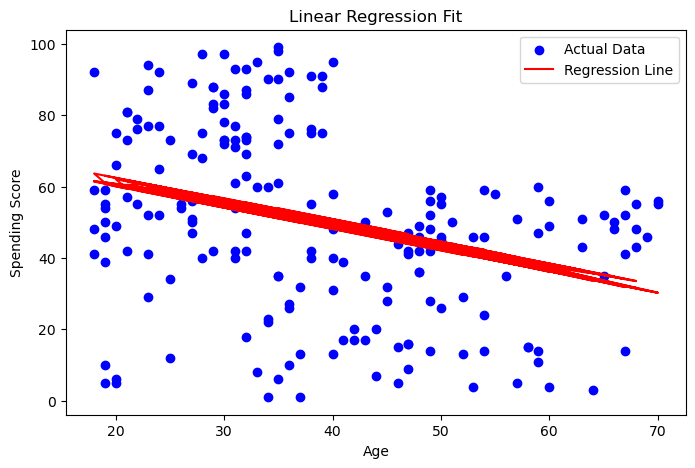

In [231]:
import matplotlib.pyplot as plt

# Scatter plot: Actual data points
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 1], y, color='blue', label='Actual Data')  # X[:, 1] is the 'Age' feature here

# Regression line: Predicted values
plt.plot(X[:, 1], np.dot(X, beta), color='red', label='Regression Line')  # Predicted y values

# Add labels and title
plt.title('Linear Regression Fit')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data (same as before)
X = data[['Age', 'Annual Income', 'Gender']].values  # Features
y = data['Spending Score'].values  # Target

# Add a column of ones to X for comparison with manual calculation (only needed for Normal Equation)
X_manual = np.c_[np.ones(X.shape[0]), X]

# Train-Test Split (Optional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("Scikit-learn Linear Regression Results:")
print("MSE:", mse)
print("R-squared:", r2)

# Compare coefficients with manual calculation
print("\nCoefficients from Scikit-learn:", model.coef_)
print("Intercept from Scikit-learn:", model.intercept_)


Scikit-learn Linear Regression Results:
MSE: 480.673141707248
R-squared: 0.025478181600745997

Coefficients from Scikit-learn: [-0.58792363  0.05386299 -1.19846561]
Intercept from Scikit-learn: 71.90498284889918


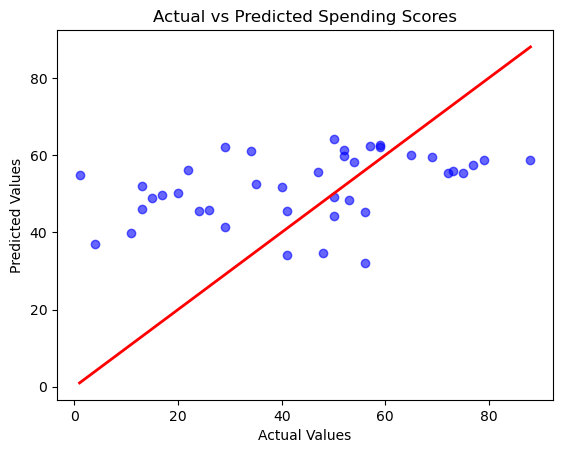

In [235]:


# Scatterplot: Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect fit line
plt.title('Actual vs Predicted Spending Scores')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# **Manual Model Implementation**

## **Key Metrics**
- **Variance of Target Variable (Spending Score):** `663.52`
- **Baseline MSE:** `663.52`
- **Model MSE:** `480.67`

### **Interpretation**
The model’s MSE (`480.67`) is **significantly lower** than the baseline MSE (`663.52`), which indicates that the model is capturing some of the relationship between the features and the target variable (`Spending Score`).

---

# **Scikit-learn Linear Regression Results**

- **MSE:** `480.67`
- **R-squared:** `0.0255`

### **Interpretation**
- The \(R^2\) value of `0.0255` suggests that the model explains only **2.5%** of the variance in `Spending Score`. 
- While the MSE is lower than the baseline, the low \(R^2\) indicates that additional features or non-linear relationships may be required to improve the model.

---

# **Summary of Results**

## **Correct Implementation**
- The **manual implementation** and **Scikit-learn** produce the **same results** for coefficients and MSE, confirming that the **Normal Equation calculations** are correct.

## **Insights**
- The model demonstrates **a working implementation**, as the MSE is better than the baseline.
- However, the low \(R^2\) value indicates limited explanatory power, suggesting that:
  - More relevant features could improve the model.
  - Nonlinear models or transformations may better capture the relationships in the data.


In [259]:
age = float(input("Enter Age: "))
annual_income = float(input("Enter Annual Income (in k$): "))
gender = int(input("Enter Gender (1 : Male, 0 : Female): "))

predicted_score = predict_spending_score(age, annual_income, gender, beta)
print(f"Predicted Spending Score: {predicted_score:.2f}")



Enter Age:  25
Enter Annual Income (in k$):  40
Enter Gender (1 for Male, 0 for Female):  1


Predicted Spending Score: 57.95
